# Linear Regression with TF from scratch

#### Package Importing

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

#### Obataing data from the file

In [22]:
# path of the dataset
dataset_file = "./dataset/example1_data.csv"

# Read dataset
DF = pd.read_csv(dataset_file)

# See few data
DF.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [23]:
# Obtain data into variables
featureset = DF['X'].values.reshape(-1,1)
target = DF['Y'].values.reshape(-1,1)

#### Visualizing data

Text(0, 0.5, 'Profit in $10,000s')

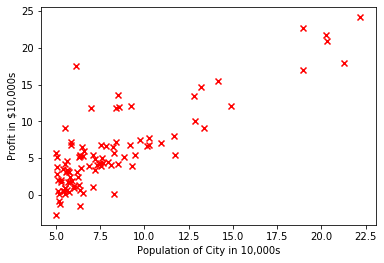

In [24]:
plt.scatter(featureset,target,marker='x',c='red')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

#### Knowing the dataset information

In [25]:

print("Number of feature: ", featureset.shape[1])
print("Number of target: ", target.shape[0])
print("Number of training examples: ", target.shape[0]) 


Number of feature:  1
Number of target:  97
Number of training examples:  97


### Building necessary method for LR

In [32]:
def compute_cost_grad(X, y, thetas):
    """ This method calculate cost and gradient  """
    # Number of training examples
    m = int(y.shape[0])
    hx = tf.matmul( X, tf.transpose(thetas) )
    cost = tf.reduce_mean(tf.square(hx-y), axis=0) / (2*m)
    grad = tf.matmul(tf.transpose(hx-y), X)
    
    return cost, grad

def predictions(X, thetas):
    return tf.matmul( X, tf.transpose(thetas) )

def gradient_descent(X, y, thetas, lr, itr):
    """ Updating parameter thetas by gradient descent """
    
    # Number of training examples
    m = int(y.shape[0])
    
    costs = []
    
    for i in tqdm(range(itr)):
        # Compute cost and grad
        cost, grad = compute_cost_grad(X, y, thetas)
        
        # Updating parameter theta
        thetas = thetas - (lr/m) * grad
        
        costs.append(cost)
    predicted = predictions(X, thetas)
    results = {
        'costs': costs,
        'theta': thetas,
        'predicted': predicted
    }
    return results

#### Setting up for training Linear Regrassion with TF

In [33]:
itr = 400 # Number of iterations
lr = 0.01 # Learning rate

# Add intercept term 
xtrain = np.hstack((np.ones(featureset.shape), featureset)) # adding a column full with value on1
ytrain = target
m = ytrain.shape[0] # number of training example

# Create plceholder to feed during training time
X = tf.placeholder(tf.float32, xtrain.shape)
y = tf.placeholder(tf.float32, ytrain.shape)

# Initialize parameter theta with zeros
thetas = tf.Variable( tf.zeros((1, xtrain.shape[1]), tf.float32) )

# Create initializer for initializing global variables
init = tf.global_variables_initializer()

# Building training on tensoflow
train = gradient_descent(X, y, thetas, lr, itr)

100%|██████████| 400/400 [00:04<00:00, 84.32it/s]


#### Run the training with tensorflow session

In [34]:
with tf.Session() as sess:
    sess.run(init)
    results = sess.run(train, feed_dict={X:xtrain, y:ytrain})


#### Plot Cost Function

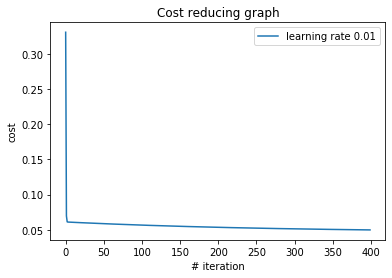

In [45]:
plt.plot(results['costs'])
plt.xlabel("# iteration")
plt.ylabel("cost")
plt.title('Cost reducing graph')
plt.legend(['learning rate 0.01'])
plt.show()

#### Plot Linear Fit

Text(0.5, 1.0, 'Linear Fit')

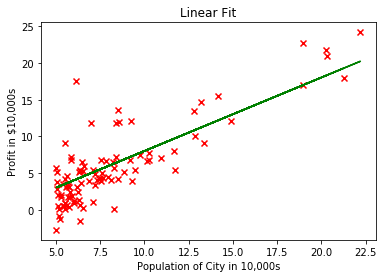

In [40]:
# Ploting features
plt.scatter(featureset,target,marker='x',c='red')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

# Ploting Linear line
plt.plot(featureset, results['predicted'], c='g')
plt.title('Linear Fit')

## Multivariate Linear Regression
#### Obataing data from the file

In [10]:
# path of the dataset
dataset_file = './dataset/ex1data2_multiple_features.csv'

# Read dataset
DF = pd.read_csv(dataset_file)
# See few data
DF.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [11]:
# Obtain data into variables
featureset = DF.values[:,:2]
target = DF.values[:,2].reshape(-1,1)

#### Knowing the dataset information

In [12]:
print("Number of feature: ", featureset.shape[1])
print("Number of target: ", target.shape[0])
print("Number of training examples: ", target.shape[0]) 


Number of feature:  2
Number of target:  47
Number of training examples:  47


#### Feature Normalization

In [13]:
def feature_normalizing(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return np.divide(X - mean, std), mean, std

In [14]:
x_norm, mean, std = feature_normalizing(featureset)

In [15]:
itr = 400 # Number of iterations
lr = 0.01 # Learning rate

# Add intercept term 
xtrain = np.hstack((np.ones(x_norm.shape), x_norm)) # adding a column full with value on1
ytrain = target
m = ytrain.shape[0] # number of training example

# Create plceholder to feed during training time
X = tf.placeholder(tf.float32, xtrain.shape)
y = tf.placeholder(tf.float32, ytrain.shape)

# Initialize parameter theta with zeros
thetas = tf.Variable( tf.zeros((1, xtrain.shape[1]), tf.float32) )

# Create initializer for initializing global variables
init = tf.global_variables_initializer()

# Building training on tensoflow
train = gradient_descent(X, y, thetas, lr, itr)

100%|██████████| 400/400 [00:05<00:00, 70.65it/s]


In [16]:
with tf.Session() as sess:
    sess.run(init)
    results = sess.run(train, feed_dict={X:xtrain, y:ytrain})

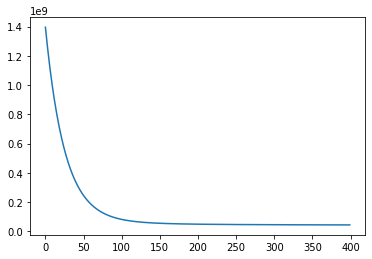

In [17]:
plt.plot(results['costs'])
plt.xlabel("# iteration")
plt.ylabel("cost")
plt.title('Cost reducing graph')
plt.legend(['learning rate 0.01'])
plt.show()